In [27]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import random
import scipy

In [28]:
N = [2,90,10100]
M_N = []
D_N = []
t_N = []

for n in N:
  M = n #monomer
  D = 0   #dimer

  M_all = []
  D_all = []
  t_all = []

  kb = 1 #forward reaction rate
  ku = 2 #backward reaction rate

  t_f = 10 #final time
  t = 0

  while t<t_f:
    M_all.append(M)
    D_all.append(D)
    t_all.append(t)
    bR = kb*M*(M-1) #binding
    uR = ku*D #unbinding
    tR = bR+uR #total rate

    wT = ss.expon.rvs(scale = 1/tR) #wait time
    t += wT
    r = random.randrange(0,tR)

    if r<bR and M>1:
      M -= 2
      D += 1
    elif r>=bR and D>0:
      M += 2
      D -= 1
    
  M_N.append(M_all)
  D_N.append(D_all)
  t_N.append(t_all)

  print(M,D)

0 1
8 41
114 4993


In [40]:
#znalezione

dt = 0.0001
tMax = 10
yTra_N = []

def dydt(y,t):
  M = y[0]
  D = y[1]
  dMdt = -2*kb*M**2 + 2*ku*D
  dDdt = -ku*D + kb*M**2
  return [dMdt,dDdt]

for n in N:
  y0 = [n,0]  #[M,D]
  times = np.arange(0,tMax,dt)
  #times = t_all
  yTra = scipy.integrate.odeint(dydt,y0,times)
  yTra_N.append(yTra)

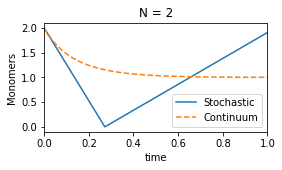

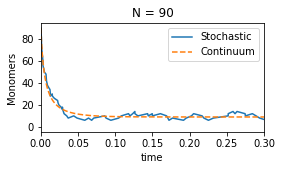

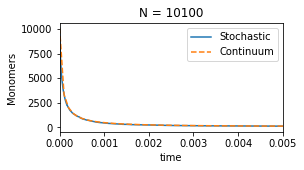

In [41]:
from matplotlib.pyplot import figure

lim = [1,0.3,0.005]

for i in range (len(N)):
  figure(figsize=(4, 2))
  plt.plot(t_N[i],M_N[i])
  plt.plot(times,yTra_N[i][:,0],'--')
  plt.xlim(0,lim[i])
  plt.title("N = " + str(N[i]))
  plt.ylabel('Monomers')
  plt.xlabel("time")
  plt.legend(("Stochastic","Continuum"))
  plt.savefig("SC_"+str(N[i])+".pdf",bbox_inches='tight')
  plt.show()

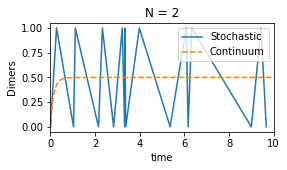

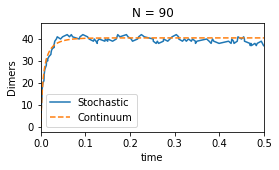

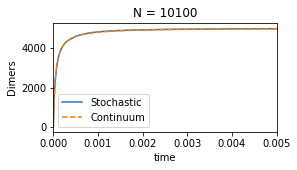

In [34]:
for i in range (len(N)):
  figure(figsize=(4, 2))
  plt.plot(t_N[i],D_N[i])
  plt.plot(times,yTra_N[i][:,1],'--')
  plt.xlim(0,lim[i])
  plt.title("N = " + str(N[i]))
  plt.ylabel('Dimers')
  plt.xlabel("time")
  plt.legend(("Stochastic","Continuum"))
  plt.show()

In [32]:
print(M_N)
print(yTra_N)

[[2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], [90, 88, 86, 84, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 30, 28, 26, 24, 22, 20, 18, 16, 18, 16, 14, 12, 10, 8, 10, 8, 6, 8, 6, 8, 10, 8, 6, 8, 10, 12, 10, 12, 14, 12, 10, 12, 10, 12, 10, 12, 10, 8, 6, 8, 6, 8, 10, 12, 10, 8, 6, 8, 10, 12, 14, 12, 14, 12, 10, 12, 10, 8, 6, 8, 10, 12, 10, 12, 10, 12, 10, 12, 14, 12, 10, 12, 14, 12, 10, 12, 14, 12, 14, 12, 10, 12, 14, 12, 10, 8, 10, 8, 10, 12, 14, 16, 14, 16, 14, 16, 14, 12, 14, 16, 18, 16, 14, 12, 10, 8, 6, 4, 6, 4, 2, 4, 6, 8, 10, 8, 10, 8, 10, 8, 10, 8, 10, 8, 6, 8, 10, 12, 10, 12, 14, 12, 10, 12, 14, 12, 10, 8, 10, 8, 10, 8, 10, 8, 6, 8, 6, 4, 6, 4, 6, 8, 6, 8, 6, 8, 10, 12, 14, 16, 14, 16, 14, 12, 10, 12, 10, 12, 10, 12, 14, 12, 14, 12, 10, 8, 10, 12, 10, 8, 6, 4, 6, 4, 6, 8, 10, 12, 10, 8, 10, 8, 6, 4, 6, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 8, 6, 8, 10, 8, 10, 8, 10, 8, 1